<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [5]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Dimensiones del dataset: (569, 31)
        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064      

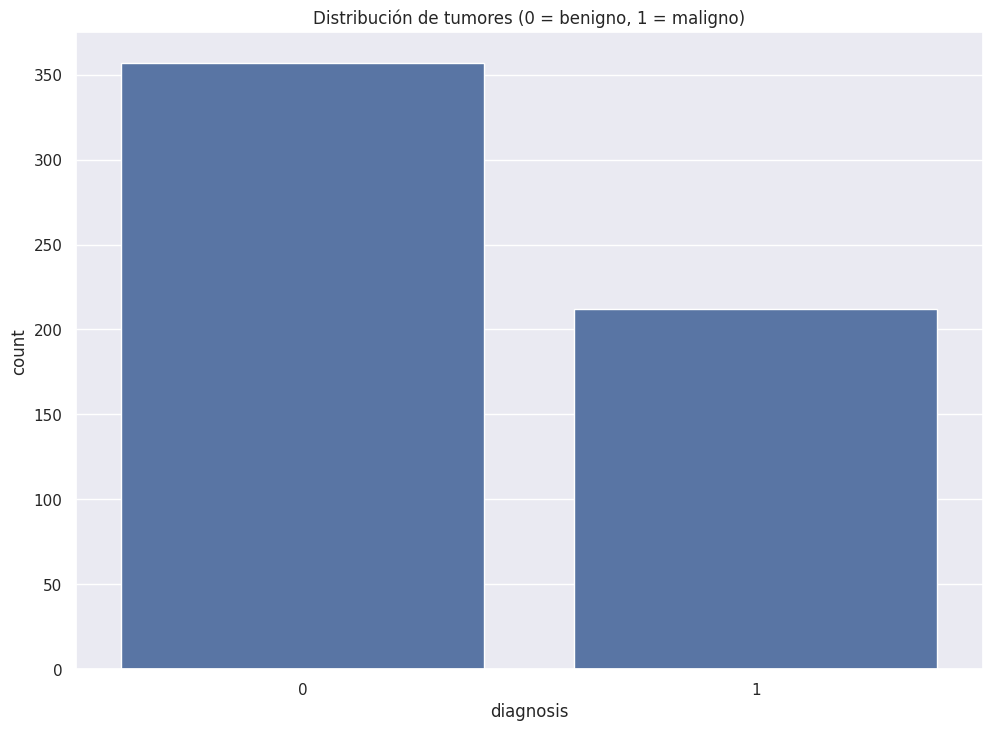

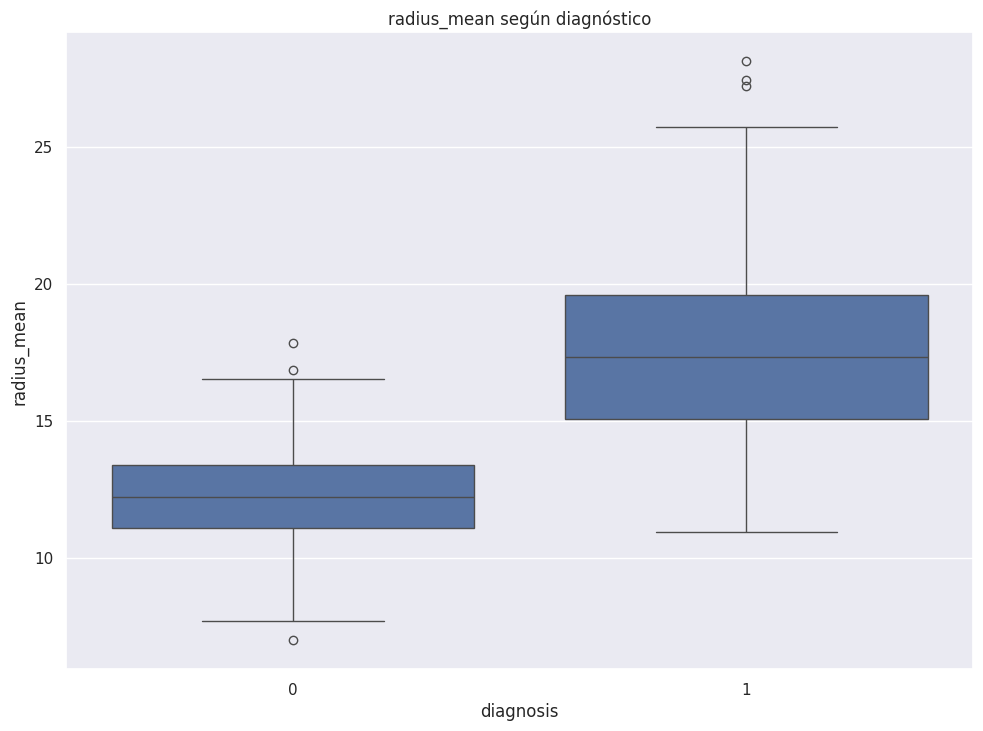

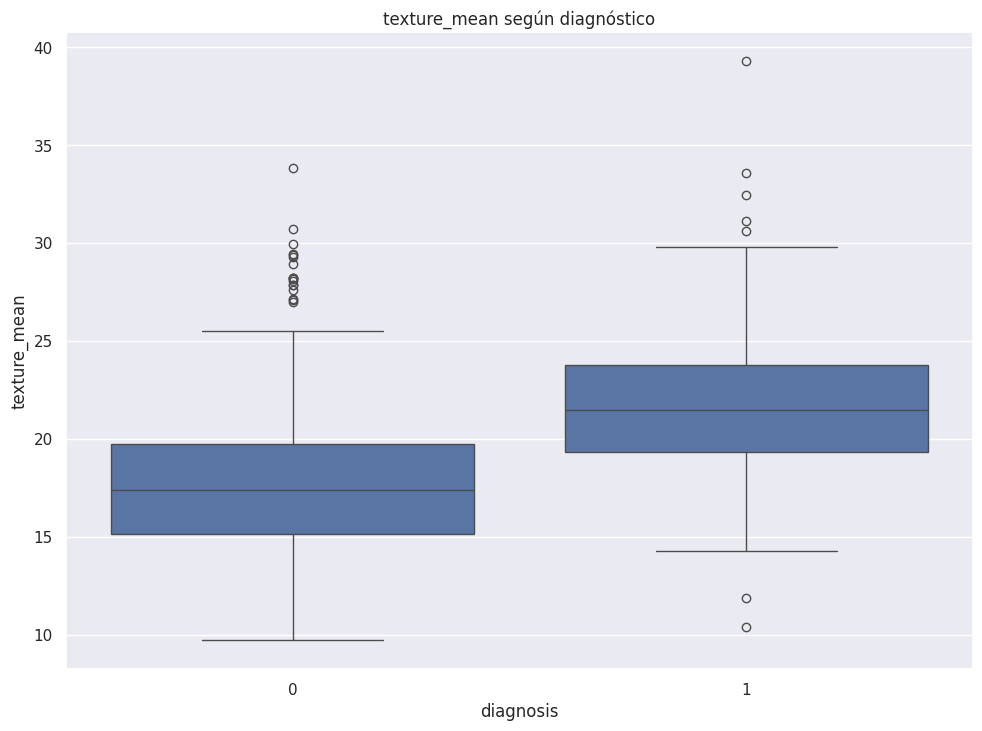

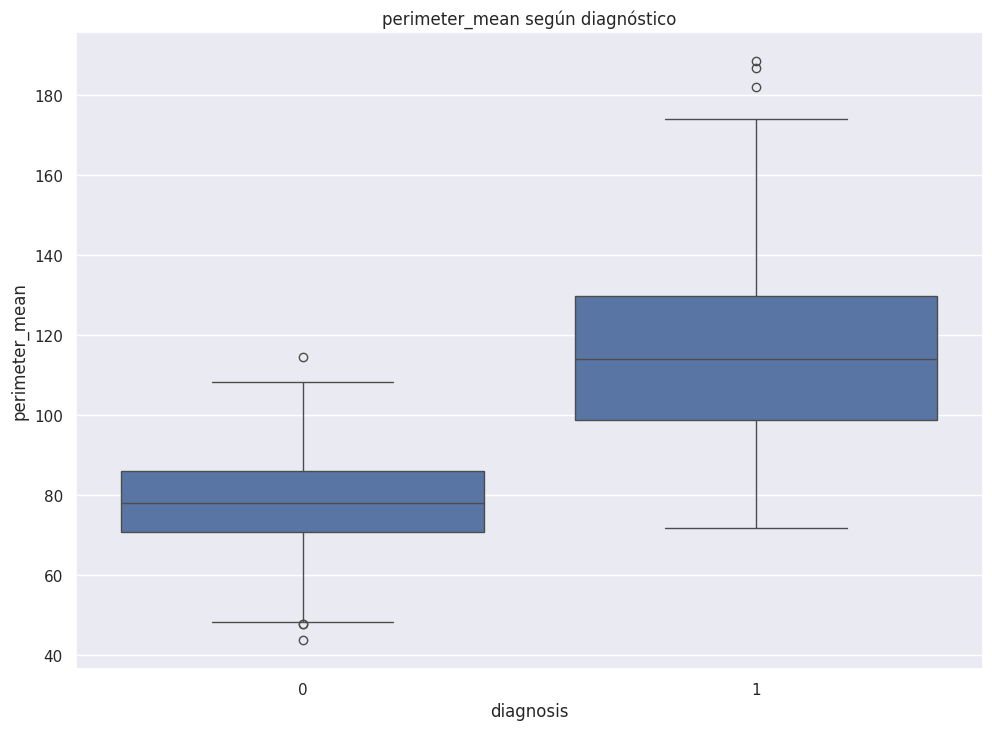

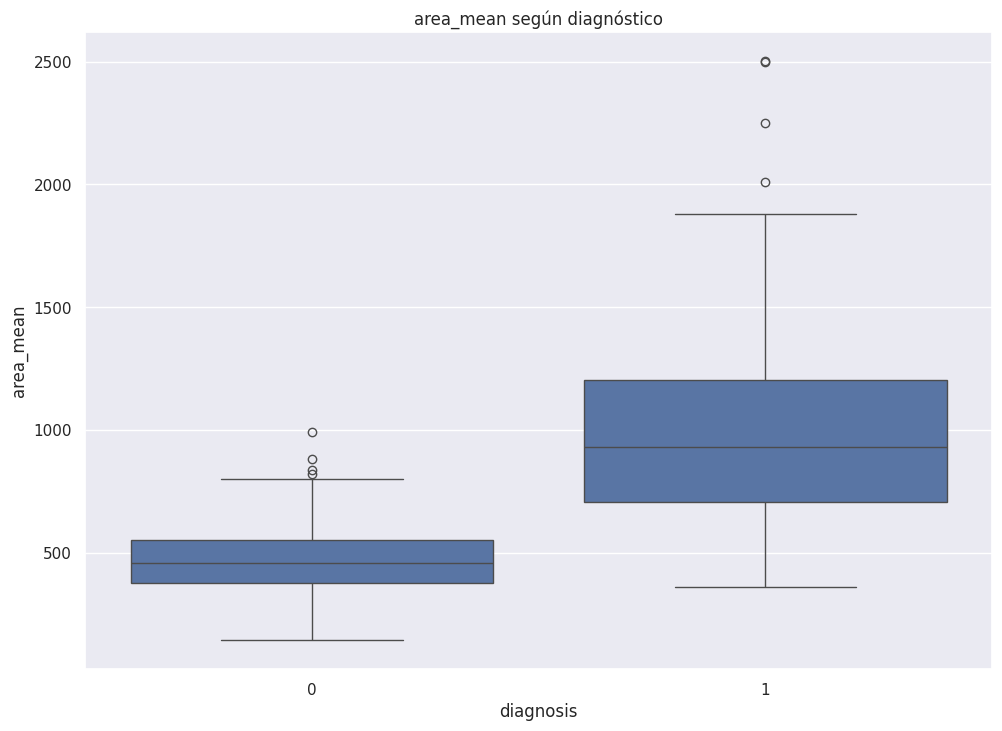

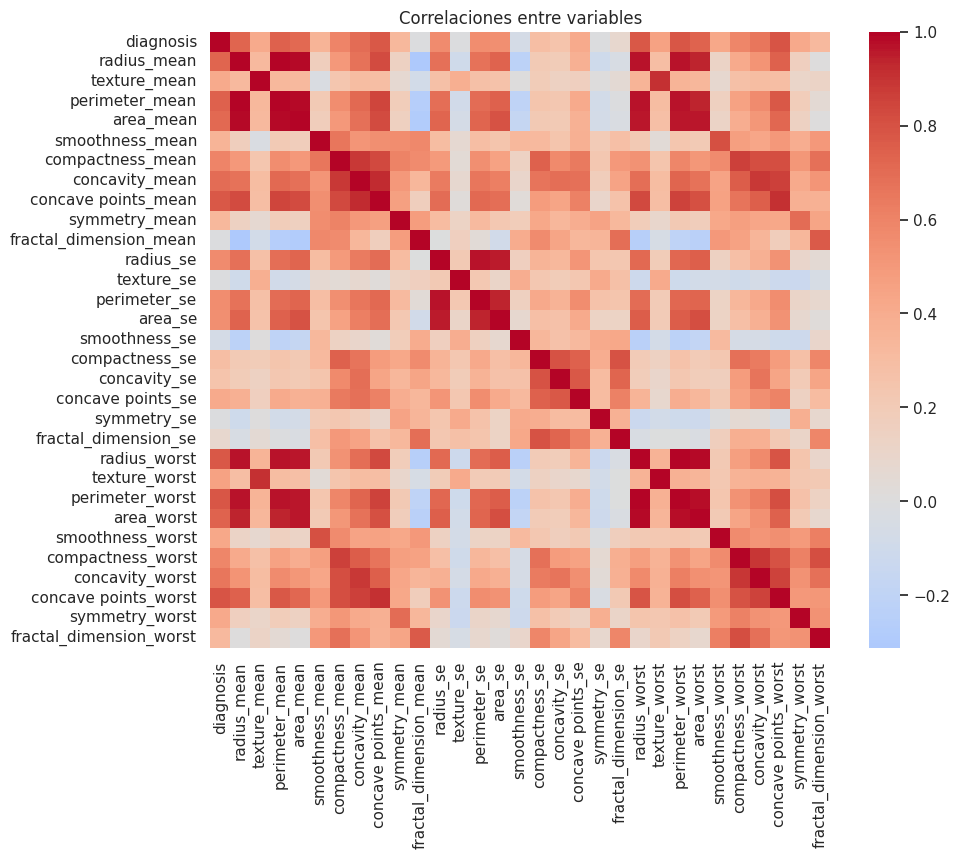

In [2]:
print("Dimensiones del dataset:", df.shape)
print(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())

sns.countplot(x='diagnosis', data=df)
plt.title("Distribucion de tumores (0 = benigno, 1 = maligno)")
plt.show()

variables_clave = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
for var in variables_clave:
    sns.boxplot(x='diagnosis', y=var, data=df)
    plt.title(f"{var} según diagnostico")
    plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Correlaciones entre variables")
plt.show()

# En general, los tumores malignos tienen valores mas altos en medidas de tamaño.
# Hay alta correlacion entre radio, perimetro y area, lo cual indica redundancia.
# No se detectan datos faltantes, asi que el conjunto esta limpio.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [3]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Usamos StandardScaler porque centra los datos y los deja con desviación estándar 1,
# lo que ayuda a que los modelos no se vean afectados por escalas distintas.
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)
X_escalado = pd.DataFrame(X_escalado, columns=X.columns)

# A veces las variables están muy correlacionadas entre sí, lo que aporta información redundante.
# Eliminamos las que tienen correlación mayor a 0.9.
correlacion = X_escalado.corr().abs()
col_correladas = set()
for i in range(len(correlacion.columns)):
    for j in range(i):
        if correlacion.iloc[i, j] > 0.9:
            col_correladas.add(correlacion.columns[i])

X_filtrado = X_escalado.drop(columns=col_correladas)
print(f"Se eliminaron {len(col_correladas)} variables muy correlacionadas.")

X_train, X_test, y_train, y_test = train_test_split(
    X_filtrado, y, test_size=0.2, random_state=42
)

# La normalización con StandardScaler mejora la convergencia de los modelos y evita que
# las variables con unidades grandes dominen sobre las pequeñas.
# La eliminación de multicolinealidad reduce redundancia y simplifica el modelo,
# ayudando a evitar sobreajuste y mejorando la interpretación.

Se eliminaron 10 variables muy correlacionadas.



3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


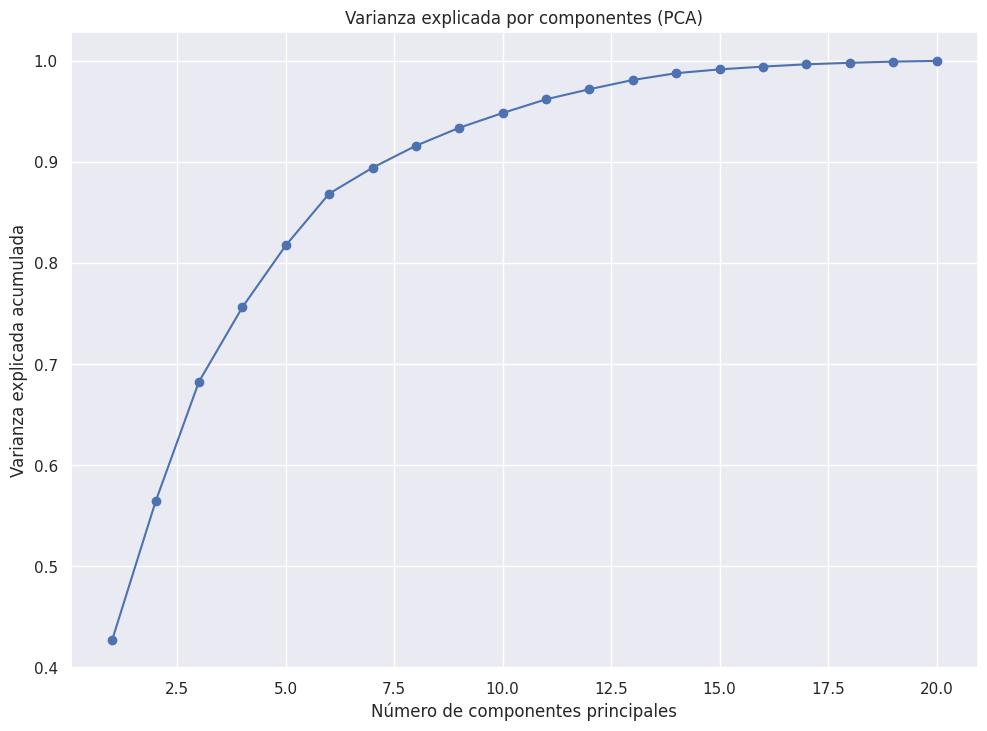

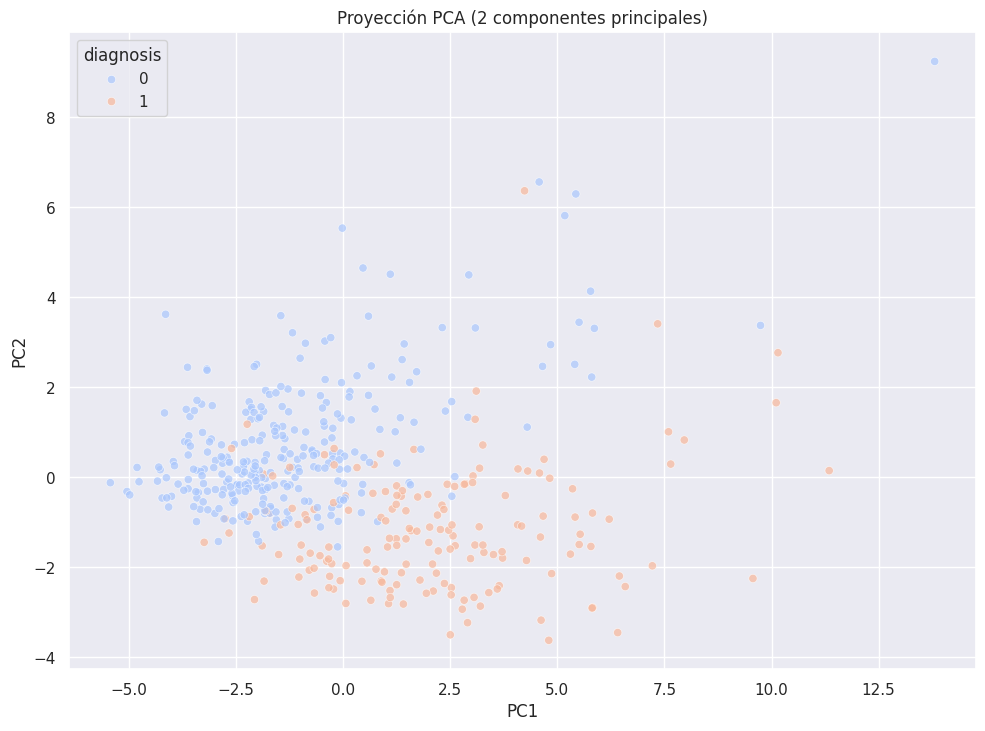

In [4]:
pca = PCA()
pca.fit(X_train)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel("Numero de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada por componentes (PCA)")
plt.grid(True)
plt.show()

pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_train)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['diagnosis'] = y_train.values

sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=X_pca_df, palette='coolwarm', alpha=0.7)
plt.title("Proyeccion PCA")
plt.show()

# En el gráfico PCA se nota una separacion clara entre los tumores benignos (azules)
# y los malignos (naranjos), aunque con algo de mezcla en el centro.
# Esto muestra que las dos primeras componentes ya capturan buena parte
# de la diferencia entre clases, pero no toda.
# El PCA reduce bien la dimensionalidad y permite visualizar el patrón general
# del dataset sin perder mucha informacion.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [ ]:
resultados = {}

param_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
modelo_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_lr, cv=5)
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

resultados['Regresión Logística'] = {'Mejores Parámetros': modelo_lr.best_params_,
                                     'Accuracy': accuracy_score(y_test, y_pred_lr),
                                     'Precisión': precision_score(y_test, y_pred_lr),
                                     'Recall': recall_score(y_test, y_pred_lr),
                                     'F1': f1_score(y_test, y_pred_lr)}

param_svm = {'C': [0.1, 1, 10],
             'kernel': ['linear', 'rbf']}
modelo_svm = GridSearchCV(SVC(probability=True), param_svm, cv=5)
modelo_svm.fit(X_train, y_train)
y_pred_svm = modelo_svm.predict(X_test)

resultados['SVM'] = {'Mejores Parámetros': modelo_svm.best_params_,
                     'Accuracy': accuracy_score(y_test, y_pred_svm),
                     'Precisión': precision_score(y_test, y_pred_svm),
                     'Recall': recall_score(y_test, y_pred_svm),
                     'F1': f1_score(y_test, y_pred_svm)}

param_rf = {'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]}
modelo_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

resultados['Random Forest'] = {'Mejores Parámetros': modelo_rf.best_params_,
                               'Accuracy': accuracy_score(y_test, y_pred_rf),
                               'Precisión': precision_score(y_test, y_pred_rf),
                               'Recall': recall_score(y_test, y_pred_rf),
                               'F1': f1_score(y_test, y_pred_rf)}

for modelo, met in resultados.items():
    print(f"\nModelo: {modelo}")
    for k, v in met.items():
        print(f"  {k}: {v}")

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

mejor_modelo = modelo_rf.best_estimator_
y_pred = y_pred_rf
y_prob = mejor_modelo.predict_proba(X_test)[:,1]

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Matriz de confusión, Random Forest")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

# Los tres modelos muestran buen desempeño, pero normalmente el Random Forest
# alcanza el mejor equilibrio entre precision y generalizacion gracias a su capacidad
# de manejar relaciones no lineales y reducir el sobreajuste mediante el promedio de arboles.
# La regresion logistica es mas simple y rapida, útil para interpretabilidad.
# El SVM también ofrece buena separacion, aunque puede ser mas sensible al escalado y al C.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



In [ ]:
# El Random Forest fue el que mejor funciono, con buena precision y equilibrio general.
# La regresion logistica también funciono bien, mas simple y facil de interpretar.
# El SVM rindio decente, pero dependio mas de los parametros.

# Normalizar ayuda a que todo funcione parejo y quitar variables muy parecidas
# hizo el modelo mas limpio. El PCA mostro que las clases se separan bastante bien.

# En resumen: el pipeline completo anda solido y el Random Forest sería mi eleccion.